In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image, ImageOps
import glob


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/64x64-faces/set_1/pic00139.jpg
/kaggle/input/64x64-faces/set_1/pic00156.jpg
/kaggle/input/64x64-faces/set_1/pic00142.jpg
/kaggle/input/64x64-faces/set_1/pic00116.jpg
/kaggle/input/64x64-faces/set_1/pic00106.jpg
/kaggle/input/64x64-faces/set_1/pic00085.jpg
/kaggle/input/64x64-faces/set_1/pic00029.jpg
/kaggle/input/64x64-faces/set_1/pic00035.jpg
/kaggle/input/64x64-faces/set_1/pic00042.jpg
/kaggle/input/64x64-faces/set_1/pic00157.jpg
/kaggle/input/64x64-faces/set_1/pic00073.jpg
/kaggle/input/64x64-faces/set_1/pic00040.jpg
/kaggle/input/64x64-faces/set_1/pic00008.jpg
/kaggle/input/64x64-faces/set_1/pic00020.jpg
/kaggle/input/64x64-faces/set_1/pic00093.jpg
/kaggle/input/64x64-faces/set_1/pic00079.jpg
/kaggle/input/64x64-faces/set_1/pic00016.jpg
/kaggle/input/64x64-faces/set_1/pic00101.jpg
/kaggle/input/64x64-faces/set_1/pic00058.jpg
/kaggle/input/64x64-faces/set_1/pic00092.jpg
/kaggle/input/64x64-faces/set_1/pic00037.jpg
/kaggle/input/64x64-faces/set_1/pic00002.jpg
/kaggle/in

In [12]:
folder = glob.glob("/kaggle/input/64x64-faces/set_1/*.jpg")
# print(folder)
folder = [file.replace('\\', '/') for file in folder]


In [7]:
matrix  = []
m_x = 0
m_y = 0
# print(matrix)

for file in folder:
    image = Image.open(file)
    image = image.convert('L')
    image_vector = np.array(image)
    matrix.append(np.array([image_vector.T.ravel()]).T)
    #     image.close()
    
    

In [9]:
matrix[0].shape

(4096, 1)

In [14]:
f_matrix = np.column_stack(matrix)
rows, columns = f_matrix.shape

mean_array = np.zeros_like(matrix[0])
for pic in matrix:
    mean_array += pic

mean_array = mean_array/columns
mean_array_list = [mean_array for i in range(columns)]

mean_mat = np.column_stack(mean_array_list)

In [15]:
R = ((f_matrix - mean_mat) @ (f_matrix - mean_mat).T) / (columns-1)
eigenvalues, eigenvectors = np.linalg.eig(R)
sorted_eigenvalues = eigenvalues.argsort()
eigenvectors.shape

(4096, 4096)

In [18]:
p = 100

vectorList = []

for i in range(p):
    vector = eigenvectors[:, sorted_eigenvalues[i]]
    vectorList.append(vector)

In [19]:
V = np.column_stack(vectorList)

In [20]:
sub_matrix = f_matrix - mean_mat

In [21]:
weight_list = []
for i in range(sub_matrix.shape[1]):
    weight = V.T @ sub_matrix[:,i]
    weight_list.append(weight)

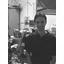

In [22]:
image = Image.open('/kaggle/input/64x64-faces/set_1/pic00064.jpg')
image = image.convert('L')
image_vector = np.array(image)
image_vector = np.array([image_vector.T.ravel()]).T
image

In [23]:
new_weight = V.T @ image_vector

In [24]:
distance_list = []

for weight in weight_list:
    distance = np.linalg.norm(new_weight - weight)
    distance_list.append(distance)

In [27]:
distance_vector = np.array(distance_list)
top = distance_vector.argsort()[:10]

In [29]:
display_list = []
for t in top:
    image = Image.open(folder[t])
    image = image.convert('L')
    display_list.append(image)


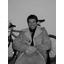

In [30]:
display_list[0]